In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline


In [31]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [32]:
from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

In [33]:
titanic_data = pd.read_csv('train.csv')

In [34]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
X = titanic_data.drop(["PassengerId",'Survived','Name','Ticket','Cabin'], axis=1)
y = titanic_data.Survived
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [36]:
# дерево решений не умеет работь со строковыми и Nan значениями
    
X = pd.get_dummies(X) # заменяем номинативные переменные числами

X = X.fillna({'Age': X.Age.median()}) # заменяем Nan значения медианой возраста

In [37]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [38]:
X = X.fillna({'Age': X.Age.median()})

In [39]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [40]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [41]:
from sklearn.model_selection import train_test_split


In [42]:
# делим датасет на тренировочный и тестовый, чтобы проверить эффективность обучения модели
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.33,random_state = 42)

In [43]:
X_train.shape

(596, 10)

In [44]:
X_test.shape

(295, 10)

In [45]:
# модель хорошо обучилась только для конкретной выборки
# с данными которая он не видела она справляется хуже
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

In [46]:
clf.score(X_train,y_train)

0.9798657718120806

In [47]:
clf.score(X_test,y_test)

0.7728813559322034

In [48]:
# задаем макс глубину обучения модели max_depth, чтобы не переобучалась
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train,y_train)

In [49]:
clf.score(X_train,y_train)

0.8238255033557047

In [50]:
clf.score(X_test,y_test)

0.8203389830508474

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
max_depth_values = range(1,100)

In [53]:
scores_data = pd.DataFrame()

In [54]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    mean_cross_val_score = cross_val_score(clf,X_train,y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [55]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.795350


In [56]:
# преобразуем датафрейм с помощью функции melt
scores_data_long = pd.melt(scores_data, id_vars='max_depth', 
                           value_vars=['train_score','test_score','cross_val_score'], 
                           var_name='set_type', value_name='score')
                                

In [57]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

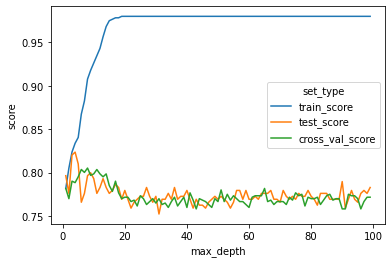

In [58]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

In [59]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.805406
206,9,cross_val_score,0.796989
207,10,cross_val_score,0.798669


In [60]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [61]:
cross_val_score(clf,X_train,y_train, cv=5).mean()

0.7986694677871148

In [62]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


In [63]:
cross_val_score(clf,X_test,y_test, cv=5).mean()

0.7898305084745763

In [64]:
from sklearn.model_selection import GridSearchCV 
#перебирает много моделй с заданными параметрами и выбирает лучший

In [65]:
clf = tree.DecisionTreeClassifier()

In [66]:
parametrs = {'criterion' : ["gini", "entropy"], "max_depth": range(1,30)}

In [67]:
grid_searchCV_clf = GridSearchCV(clf, parametrs, cv=5)

In [68]:
grid_searchCV_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [69]:
grid_searchCV_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [70]:
best_clf = grid_searchCV_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [71]:
best_clf.score(X_test,y_test)

0.8

In [72]:
from sklearn.metrics import precision_score, recall_score

In [73]:
y_pred = best_clf.predict(X_test)

In [74]:
precision_score(y_test, y_pred)

0.8144329896907216

In [75]:
recall_score(y_test, y_pred)

0.6583333333333333

In [76]:
y_pred_probability = best_clf.predict_proba(X_test)
y_pred_probability

array([[0.55555556, 0.44444444],
       [0.75      , 0.25      ],
       [0.93913043, 0.06086957],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.93913043, 0.06086957],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.88      , 0.12      ],
       [1.        , 0.        ],
       [0.86666667, 0.13333333],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.93913043, 0.06086957],
       [0.63157895, 0.36842105],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.63157895, 0.36842105],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.

<AxesSubplot:>

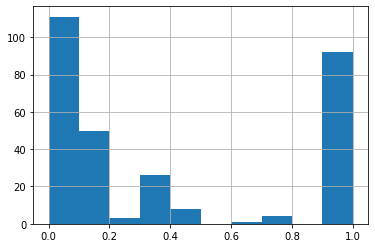

In [77]:
pd.Series(y_pred_probability[:,1]).hist()

In [78]:
y_pred = np.where(y_pred_probability[:,1] > 0.8, 1, 0 )

In [79]:
precision_score(y_test, y_pred)

0.8260869565217391

In [107]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [108]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

In [122]:
graph = Source(tree.export_graphviz(clf
               , out_file=None
               , feature_names= list(X)
               , class_names=['Died', 'Survived']
               , filled = True ))
display(SVG(graph.pipe(format='svg')))

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

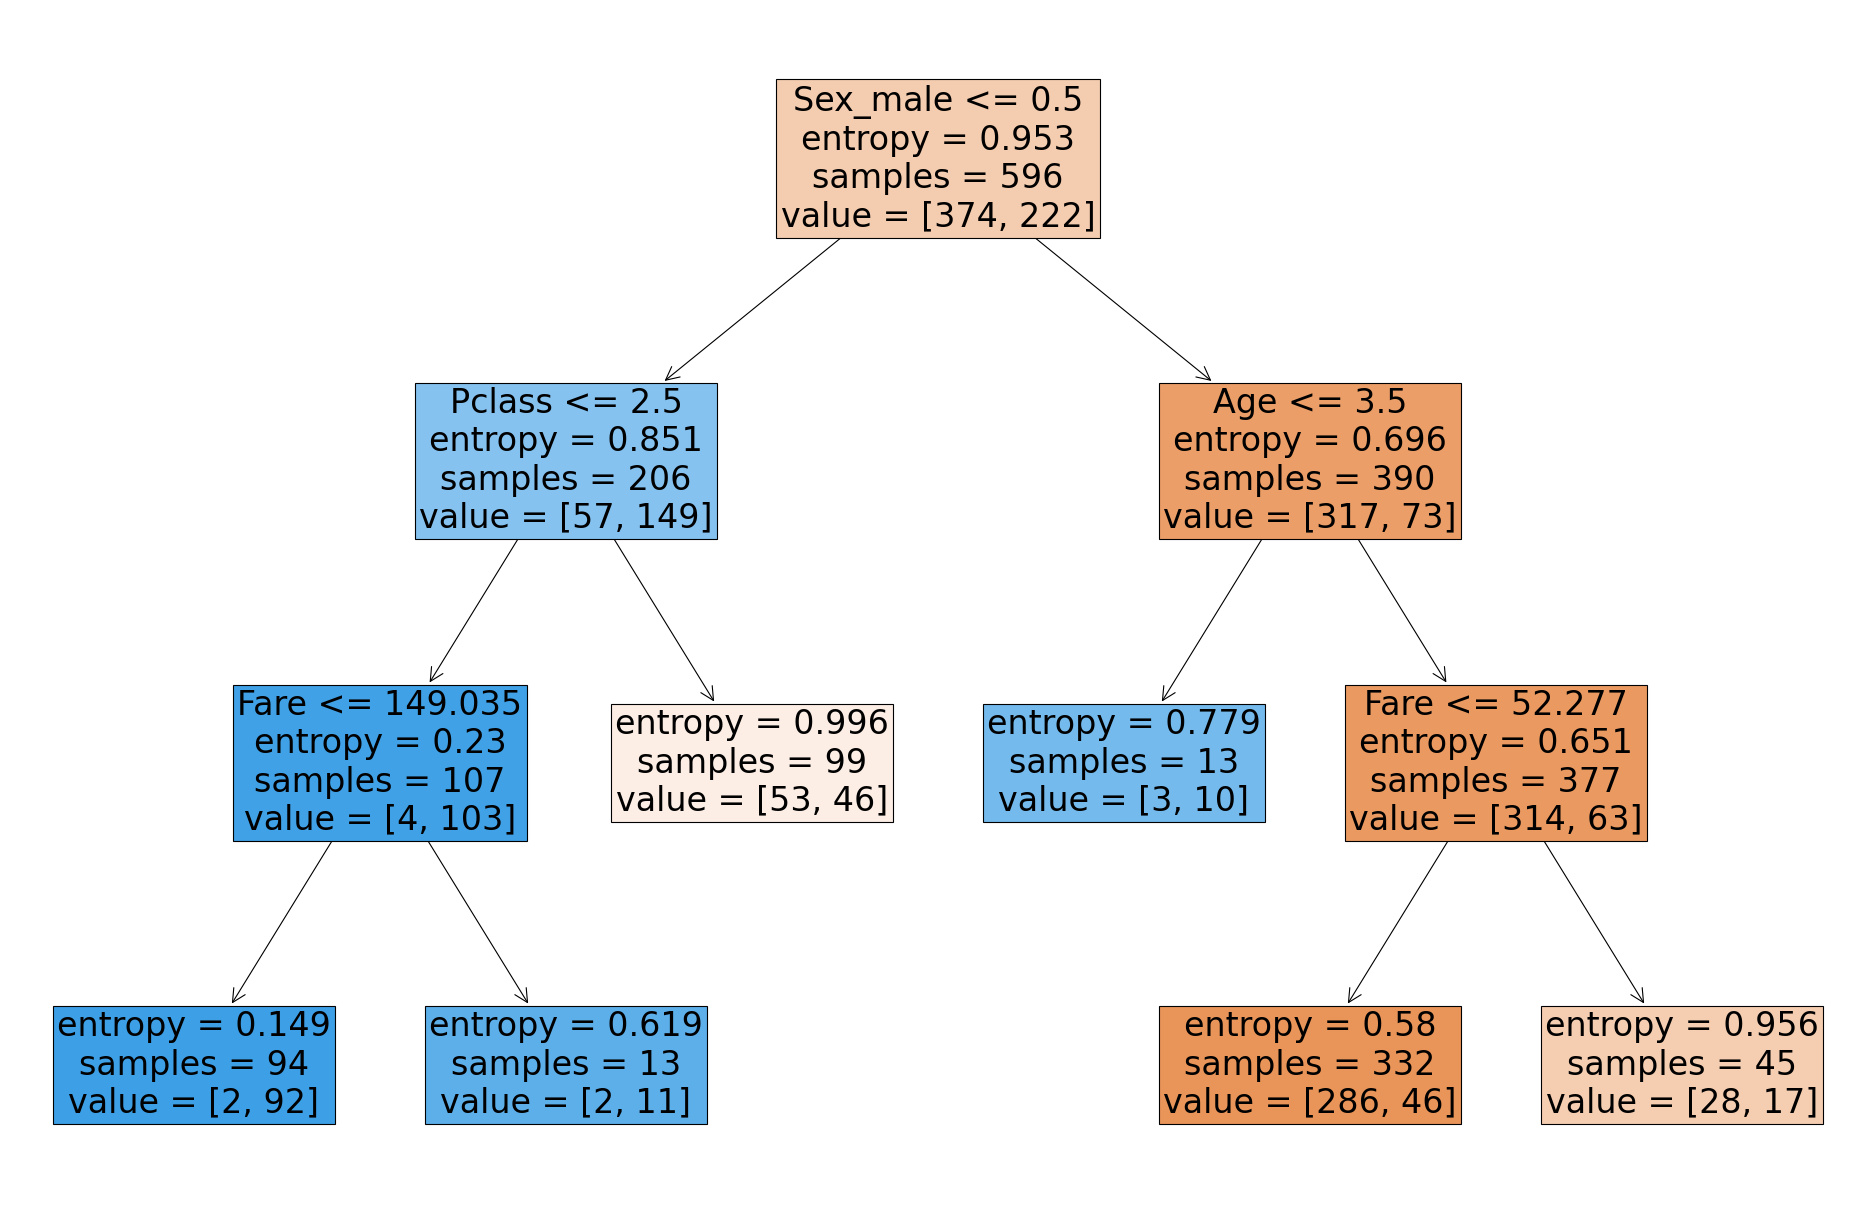

In [115]:
plt.figure(figsize=(30, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=30,filled=True,feature_names=list(X))

# 3 Степ Random forest


In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
clf_rf = RandomForestClassifier()

In [144]:
parametrs = {'n_estimators' : [10,20,30], 'max_depth' : [2,5,7,10] }

In [145]:
grid_searchCV_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [146]:
grid_searchCV_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [150]:
best_clf = grid_searchCV_clf.best_estimator_

In [151]:
y_pred = best_clf.predict(X_test)

In [152]:
best_clf.score(X_test,y_test)

0.8101694915254237

In [153]:
precision_score(y_test, y_pred)

0.826530612244898

In [154]:
recall_score(y_test, y_pred)

0.675

In [156]:
feature_importances = best_clf.feature_importances_

In [176]:
feature_importances_df = pd.DataFrame({'features' : list(X_train),
                                      'feature_importances' : feature_importances })

<AxesSubplot:>

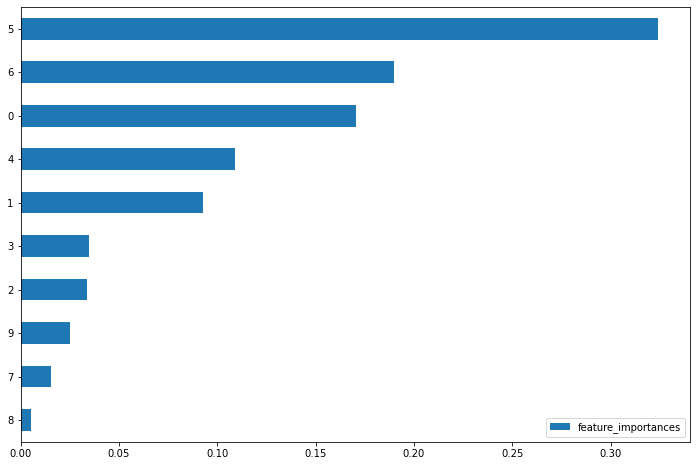

In [166]:

feature_importances_df.sort_values('feature_importances', ascending=True).plot(kind='barh', figsize=(12,8))

In [179]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])

<AxesSubplot:>

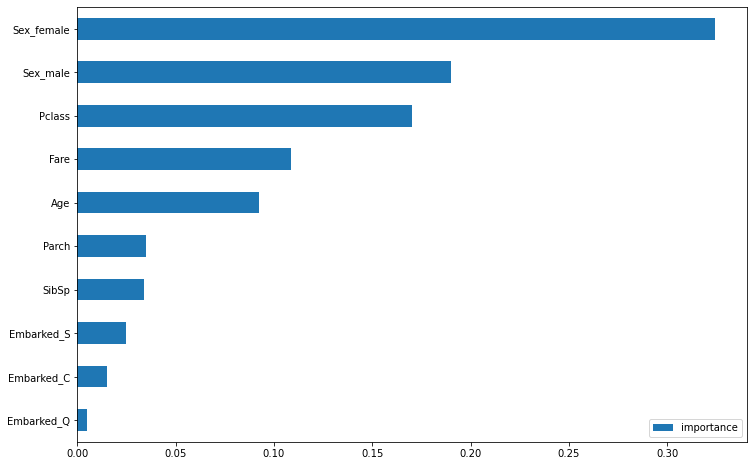

In [181]:
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [183]:
heart_data = pd.read_csv('heart.csv')
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)

In [189]:
X = heart_data.drop('target', axis = 1)
y = heart_data.target

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 0 )

In [208]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [209]:
im = pd.DataFrame(rf.feature_importances_, index=list(X_train), columns=['importance'])

<AxesSubplot:>

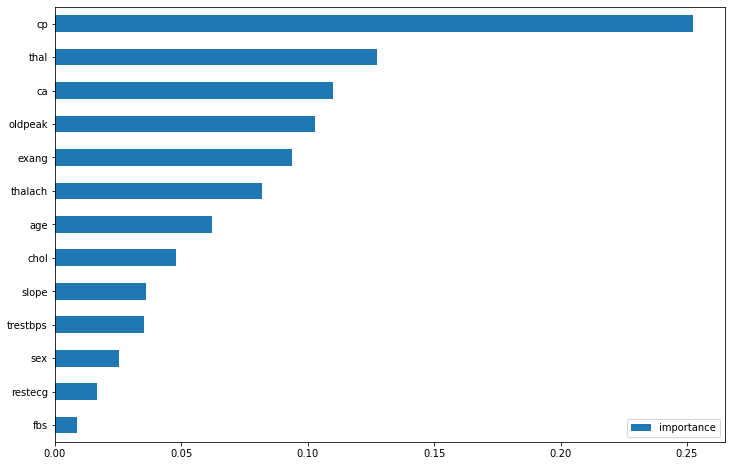

In [210]:
im.sort_values('importance', ascending=True).plot(kind= 'barh', figsize = (12,8))